## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [33]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## EDA AND PREPROCESSING

In [34]:
train.shape

(891, 12)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Graphs for some columns

<AxesSubplot:xlabel='Survived', ylabel='count'>

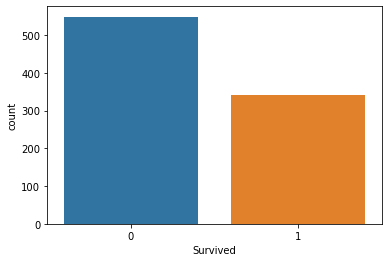

In [37]:
sns.countplot(x = train["Survived"],data = train)

In [38]:
train.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

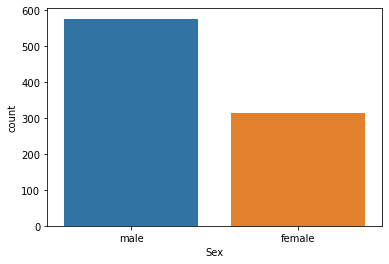

In [39]:
sns.countplot(x = train["Sex"],data  = train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

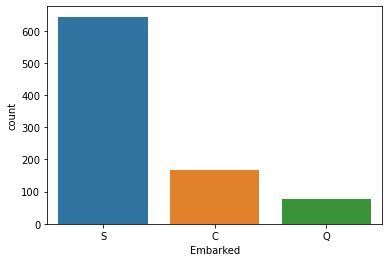

In [40]:
sns.countplot(x = train["Embarked"],data  = train)

/Users/sultanhadzidursun-ogly/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

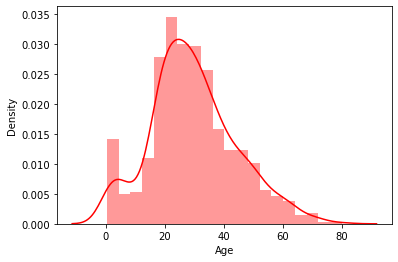

In [41]:
sns.distplot(train["Age"],color ='r')

/Users/sultanhadzidursun-ogly/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

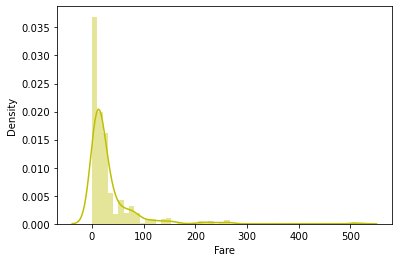

In [42]:
sns.distplot(train["Fare"],color = 'y')

## Handling with Nan values

In [44]:
miss_val = train.isnull().sum()

In [45]:
cells = np.product(train.shape)
total_miss = miss_val.sum()
percent_missing = (total_miss/cells) * 100
print(percent_missing)

8.099513655069211


In [46]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


## Labeling

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train["Sex"]=le.fit_transform(train["Sex"])

In [48]:
train.drop("Cabin",axis=1,inplace=True)

In [49]:
train.Embarked.fillna(train.Embarked.mode()[0], inplace = True)

In [50]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [51]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [52]:
train["Embarked"]=le.fit_transform(train["Embarked"])

In [53]:
train.drop(['Ticket','PassengerId','Name','Age',"Fare"],axis=1,inplace=True)

In [54]:
train

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,1,1,0,2
1,1,1,0,1,0,0
2,1,3,0,0,0,2
3,1,1,0,1,0,2
4,0,3,1,0,0,2
...,...,...,...,...,...,...
886,0,2,1,0,0,2
887,1,1,0,0,0,2
888,0,3,0,1,2,2
889,1,1,1,0,0,0


## Work with test dataset

In [55]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [56]:
test.drop(['Ticket','PassengerId','Name','Cabin','Age',"Fare"],axis=1,inplace=True)

In [57]:
test

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,0,0,Q
1,3,female,1,0,S
2,2,male,0,0,Q
3,3,male,0,0,S
4,3,female,1,1,S
...,...,...,...,...,...
413,3,male,0,0,S
414,1,female,0,0,C
415,3,male,0,0,S
416,3,male,0,0,S


In [58]:
le = preprocessing.LabelEncoder()
test["Sex"]=le.fit_transform(test["Sex"])

In [59]:
test

,Pclass,Sex,SibSp,Parch,Embarked
0,3,1,0,0,Q
1,3,0,1,0,S
2,2,1,0,0,Q
3,3,1,0,0,S
4,3,0,1,1,S
...,...,...,...,...,...
413,3,1,0,0,S
414,1,0,0,0,C
415,3,1,0,0,S
416,3,1,0,0,S


In [60]:
test.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [61]:
test["Embarked"]=le.fit_transform(test["Embarked"])

In [62]:
test

,Pclass,Sex,SibSp,Parch,Embarked
0,3,1,0,0,1
1,3,0,1,0,2
2,2,1,0,0,1
3,3,1,0,0,2
4,3,0,1,1,2
...,...,...,...,...,...
413,3,1,0,0,2
414,1,0,0,0,0
415,3,1,0,0,2
416,3,1,0,0,2


## Modeling

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X=train.drop(['Survived'],axis='columns')

In [65]:
y=train['Survived']

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [68]:
model.fit(X_train,y_train)

LogisticRegression()

In [69]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1])

In [71]:
model.score(X_test,y_test)

0.770949720670391

In [72]:
model.fit(X,y)

LogisticRegression()

In [74]:
prediction=model.predict(test)

In [ ]:
submission=pd.DataFrame({"PassengerId": submission["PassengerId"],"Survived":pred})

In [78]:
submission = pd.read_csv("gender_submission.csv")

In [79]:
submission=pd.DataFrame({"PassengerId": submission["PassengerId"],"Survived":prediction})

In [80]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('submission.csv',index=False)